<a href="https://colab.research.google.com/github/VicMedJim/proyectoDemoCursoPrework/blob/main/EJERCICIO_SURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO - ANALISTA CUANTITATIVO**

Para responder las siguientes preguntas utiliza R o python para hacer tu análisis.

Se quiere analizar el fondo1 considerando 3 activos: MXWD, mbonos, mudis
- **El Fondo 1, ¿a qué activo es más sensible?**

Para responder la primera pregunta primero limpie la información, ya que teniamos espacios vacios y datos con "#N/A".
Los casos vacios los sustituí por ceros y los casos con "#N/A" por la información anterior para no hacer un desvio de la información.
Adicional, ya que existía información que impactaba, decidi reducir el periodo de la muestra para quitar outliers y la información mostrada es del 2006 a junio 2020.

Lo cual repercutio en ofrecer una mejor coeficiente de correlación y de regresión lineal.

Finalmente, para ver la sensibilidad y observar que activo tenia mayor impacto al **fondo1** realice una correlación entre variables. Resutando que la variable con mayor correlación era **mbonos** con una relación de 0.99.

- **Si tuvieras que estimar como paga el fondo1 dado los otros activos. ¿Cuánto hubiera pagado Fondo1 al cierre de 2020?**

Para responder la última pregunta realice una Regresión Lineal de la variables fondo1 como variable dependiente y mbonos como variable independiente.

Por lo que al cierre del 2020 se pagaría por el **Fondo1 $17.515**




In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/SURA"
!ls

/content/drive/My Drive/Colab Notebooks/SURA
Ejercicio_BD.csv  EJERCICIO_SURA.ipynb


In [ ]:
import pandas as pd
import numpy as np
pd.__version__

'1.1.5'

In [ ]:
df_fondo =  pd.read_csv("/content/drive/My Drive/Colab Notebooks/SURA/Ejercicio_BD.csv")
df_fondo.head(5)

,Dates,USDMXN,MXWD,mudis,mbonos,fondo1
0,02/01/2006,10.6360,309.95,224.8676,123.8019,4.058688
1,03/01/2006,10.6278,315.46,228.5711,123.8724,4.058612
2,04/01/2006,10.5820,319.05,228.4825,124.2410,4.066191
3,05/01/2006,10.6323,319.20,228.3067,123.9300,4.068855
4,06/01/2006,10.5624,322.33,229.4388,124.3573,4.068880


In [ ]:
df_fondo.shape

(3782, 6)

In [ ]:
df_fondo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   3782 non-null   object 
 1   USDMXN  3782 non-null   float64
 2   MXWD    3782 non-null   float64
 3   mudis   3782 non-null   float64
 4   mbonos  3782 non-null   float64
 5   fondo1  3782 non-null   float64
dtypes: float64(5), object(1)
memory usage: 177.4+ KB


In [ ]:
df_fondo.fillna(axis= 1, method= "bfill").fillna(0)

,Dates,USDMXN,MXWD,mudis,mbonos,fondo1
0,02/01/2006,10.6360,309.95,224.8676,123.8019,4.058688
1,03/01/2006,10.6278,315.46,228.5711,123.8724,4.058612
2,04/01/2006,10.5820,319.05,228.4825,124.2410,4.066191
3,05/01/2006,10.6323,319.20,228.3067,123.9300,4.068855
4,06/01/2006,10.5624,322.33,229.4388,124.3573,4.068880
...,...,...,...,...,...,...
3777,24/06/2020,22.7952,521.38,824.6200,453.1013,15.130767
3778,25/06/2020,22.6599,523.75,827.7795,455.1903,15.053995
3779,26/06/2020,23.0520,515.81,832.5419,458.9307,15.101678
3780,29/06/2020,23.0767,519.53,832.7488,459.4288,15.079390


In [ ]:
df_fondo.replace("#N/D",0)

,Dates,USDMXN,MXWD,mudis,mbonos,fondo1
0,02/01/2006,10.6360,309.95,224.8676,123.8019,4.058688
1,03/01/2006,10.6278,315.46,228.5711,123.8724,4.058612
2,04/01/2006,10.5820,319.05,228.4825,124.2410,4.066191
3,05/01/2006,10.6323,319.20,228.3067,123.9300,4.068855
4,06/01/2006,10.5624,322.33,229.4388,124.3573,4.068880
...,...,...,...,...,...,...
3777,24/06/2020,22.7952,521.38,824.6200,453.1013,15.130767
3778,25/06/2020,22.6599,523.75,827.7795,455.1903,15.053995
3779,26/06/2020,23.0520,515.81,832.5419,458.9307,15.101678
3780,29/06/2020,23.0767,519.53,832.7488,459.4288,15.079390


In [ ]:
df_fondo.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3777    False
3778    False
3779    False
3780    False
3781    False
Length: 3782, dtype: bool

In [ ]:
df_fondo["Dates"] = pd.to_datetime(df_fondo["Dates"])
df_fondo["Dates"]

0      2006-02-01
1      2006-03-01
2      2006-04-01
3      2006-05-01
4      2006-06-01
          ...    
3777   2020-06-24
3778   2020-06-25
3779   2020-06-26
3780   2020-06-29
3781   2020-06-30
Name: Dates, Length: 3782, dtype: datetime64[ns]

In [ ]:
df_fondo["fondo1"] = pd.to_numeric(df_fondo["fondo1"], errors = "coerce")
df_fondo["fondo1"]

0        4.058688
1        4.058612
2        4.066191
3        4.068855
4        4.068880
          ...    
3777    15.130767
3778    15.053995
3779    15.101678
3780    15.079390
3781    15.079390
Name: fondo1, Length: 3782, dtype: float64

In [ ]:
df_fondo.isnull().values

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [ ]:
df_fondo.isnull().any()

Dates     False
USDMXN    False
MXWD      False
mudis     False
mbonos    False
fondo1    False
dtype: bool

In [ ]:
df_fondo.isnull().sum()

Dates     0
USDMXN    0
MXWD      0
mudis     0
mbonos    0
fondo1    0
dtype: int64

In [ ]:
df_fondo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   3782 non-null   datetime64[ns]
 1   USDMXN  3782 non-null   float64       
 2   MXWD    3782 non-null   float64       
 3   mudis   3782 non-null   float64       
 4   mbonos  3782 non-null   float64       
 5   fondo1  3782 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 177.4 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

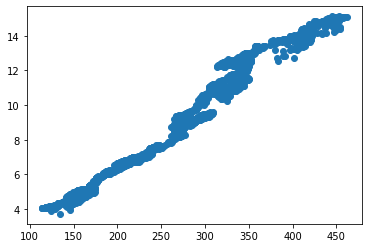

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_fondo.mbonos,df_fondo.fondo1)
plt.show()

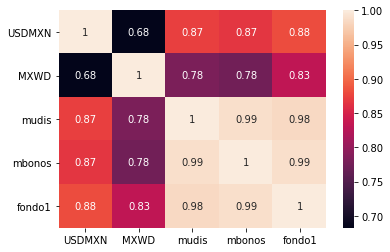

In [ ]:
sns.heatmap(df_fondo.corr(), annot=True)

In [ ]:
from sklearn import linear_model

In [ ]:
matriz = df_fondo.to_numpy()
matriz

array([[Timestamp('2006-02-01 00:00:00'), 10.636, 309.95, 224.8676,
        123.8019, 4.058688],
       [Timestamp('2006-03-01 00:00:00'), 10.6278, 315.46, 228.5711,
        123.8724, 4.058612],
       [Timestamp('2006-04-01 00:00:00'), 10.582, 319.05, 228.4825,
        124.241, 4.066191000000001],
       ...,
       [Timestamp('2020-06-26 00:00:00'), 23.052, 515.81, 832.5419,
        458.9307, 15.101678],
       [Timestamp('2020-06-29 00:00:00'), 23.0767, 519.53, 832.7488,
        459.4288, 15.07939],
       [Timestamp('2020-06-30 00:00:00'), 22.9924, 524.91, 832.4766,
        461.4994, 15.07939]], dtype=object)

In [ ]:
# Variable Independiente o X
mbonos = matriz[:,4]
mbonos

array([123.8019, 123.8724, 124.241, ..., 458.9307, 459.4288, 461.4994],
      dtype=object)

In [ ]:
mbonos = mbonos.reshape(-1, 1)
mbonos

array([[123.8019],
       [123.8724],
       [124.241],
       ...,
       [458.9307],
       [459.4288],
       [461.4994]], dtype=object)

In [ ]:
# Variable Dependiente o Y
fondo1 = matriz[:,5]
fondo1

array([4.058688, 4.058612, 4.066191000000001, ..., 15.101678, 15.07939,
       15.07939], dtype=object)

In [ ]:
fondo1 = fondo1.reshape(-1, 1)
fondo1

array([[4.058688],
       [4.058612],
       [4.066191000000001],
       ...,
       [15.101678],
       [15.07939],
       [15.07939]], dtype=object)

Mínimos Cuadrados

In [ ]:
model = linear_model.LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
results = model.fit(mbonos,fondo1)
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
results.coef_

array([[0.03716381]])

In [ ]:
results.intercept_

array([-0.91618198])

In [ ]:
fondo1_cal = model.predict(mbonos)
fondo1_cal

array([[ 3.68476879],
       [ 3.68738884],
       [ 3.70108742],
       ...,
       [16.13943316],
       [16.15794446],
       [16.23489585]])

In [ ]:
results.score(mbonos,fondo1)

0.9779830280506309

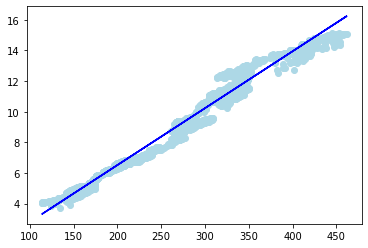

In [ ]:
plt.scatter(mbonos,fondo1, color= "lightblue")
plt.plot(mbonos, fondo1_cal, color= "blue")